In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE,SequentialFeatureSelector
from tqdm import tqdm
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import ADASYN
from xgboost import XGBClassifier
from sklearn.base import clone
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
    
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier,StackingClassifier,AdaBoostClassifier,RandomForestClassifier
rs = 0

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_confusion_matrix,f1_score,precision_score,recall_score,RocCurveDisplay,PrecisionRecallDisplay

In [2]:
processed_adasyn_train_data = pd.read_csv("processed_adasyn_train_data.csv")
processed_adasyn_train_data_trX = processed_adasyn_train_data.drop(columns=["class"],axis=1)
processed_adasyn_train_data_trY = processed_adasyn_train_data["class"]

In [3]:
processed_test_data = pd.read_csv("Processed_test_data.csv")
processed_test_data_X = processed_test_data.drop(columns=["class"],axis=1)
processed_test_data_Y = processed_test_data["class"]

In [4]:
#Function to obtain different metrics based on predicted class labels
def print_metrics(y_test,y_pred,name):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted Labels")
    plt.ylabel("Actual Labels")
    plt.title("Confusion Matrix Obtained")
    plt.show();
    accuracy_value = round(accuracy_score(y_test,y_pred),4)
    f1_value = round(f1_score(y_test,y_pred,labels=np.unique(y_pred)),4) 
    prec = round(precision_score(y_test,y_pred,labels=np.unique(y_pred)),4)
    rec = round(recall_score(y_test,y_pred,labels=np.unique(y_pred)),4)
    print("Accuarcy value obtained is ",accuracy_value)
    print("F1-score obtained is ",f1_value)
    print("Precision obtained is ",prec)
    print("Recall obtained is ",rec)
    roc_display = RocCurveDisplay.from_predictions(y_test,y_pred,name=name)
    _ = roc_display.ax_.set_title("ROC curve")
    pr_display = PrecisionRecallDisplay.from_predictions(y_test, y_pred, name=name)
    _ = pr_display.ax_.set_title("Precision-Recall curve")
    return [accuracy_value,f1_value,prec,rec]

In [5]:
best_results_table = []

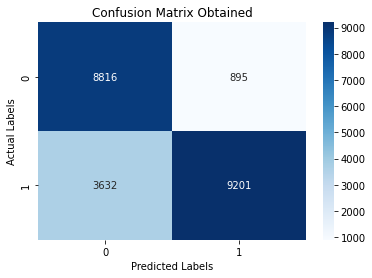

Accuarcy value obtained is  0.7992
F1-score obtained is  0.8026
Precision obtained is  0.9114
Recall obtained is  0.717


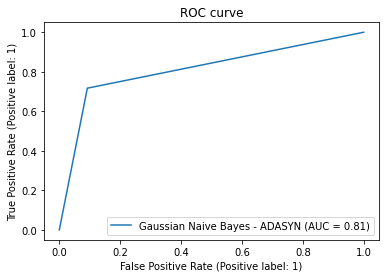

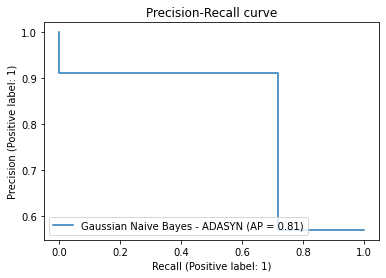

In [6]:
gnb = GaussianNB()
sfs = SequentialFeatureSelector(gnb, n_features_to_select=23)
gnb_sfs_pipeline = Pipeline([('sfs', sfs), ('gnb', gnb)])
gnb_sfs_pipeline.fit(processed_adasyn_train_data_trX,processed_adasyn_train_data_trY)
gnb_sfs_pipeline_yPred = gnb_sfs_pipeline.predict(processed_test_data_X)
gnb_list = ["Gaussian Naive Bayes - ADASYN after Hyperparameter Tuning and Feature Selection based on Sequential Feature Selection"]
gnb_list.extend(print_metrics(processed_test_data_Y, gnb_sfs_pipeline_yPred,"Gaussian Naive Bayes - ADASYN"))
best_results_table.append(gnb_list)

In [7]:
import pickle
pickle.dump(gnb_sfs_pipeline, open('gnb_sfs_pipeline.pkl', 'wb'))

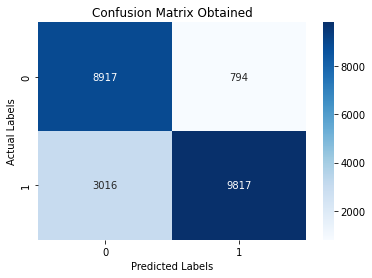

Accuarcy value obtained is  0.831
F1-score obtained is  0.8375
Precision obtained is  0.9252
Recall obtained is  0.765


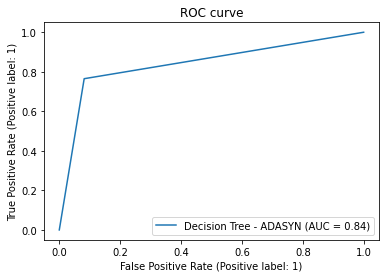

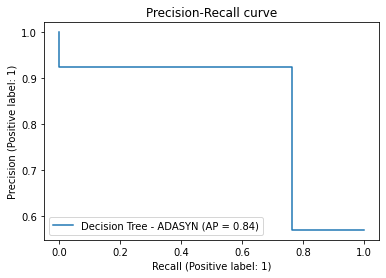

In [9]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=5,random_state=0)
rfe = RFE(dt, n_features_to_select=25)
dt_rfe_pipeline = Pipeline([('rfe', rfe), ('dt', dt)])
dt_rfe_pipeline.fit(processed_adasyn_train_data_trX,processed_adasyn_train_data_trY)
dt_rfe_pipeline_yPred = dt_rfe_pipeline.predict(processed_test_data_X)
dt_list = ["Decision Tree - ADASYN after Hyperparameter Tuning and Feature Selection based on Recursive Feature Elimination"]
dt_list.extend(print_metrics(processed_test_data_Y, dt_rfe_pipeline_yPred,"Decision Tree - ADASYN"))
best_results_table.append(dt_list)

In [10]:
pickle.dump(dt_rfe_pipeline, open('dt_rfe_pipeline.pkl', 'wb'))

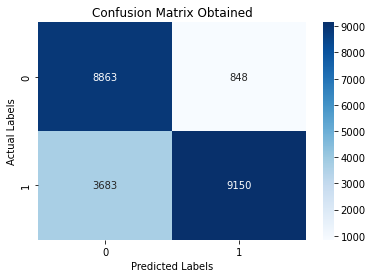

Accuarcy value obtained is  0.799
F1-score obtained is  0.8015
Precision obtained is  0.9152
Recall obtained is  0.713


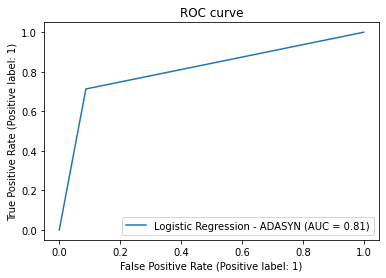

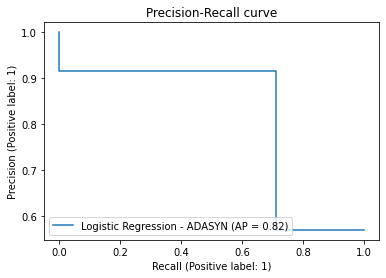

In [11]:
logreg = LogisticRegression(C=0.012742749857031334, max_iter=1000, penalty='l1', random_state=0, solver='liblinear')
rfe = RFE(logreg, n_features_to_select=12)
logreg_rfe_pipeline = Pipeline([('rfe', rfe), ('logreg', logreg)])
logreg_rfe_pipeline.fit(processed_adasyn_train_data_trX,processed_adasyn_train_data_trY)
logreg_rfe_pipeline_yPred = logreg_rfe_pipeline.predict(processed_test_data_X)
logreg_list = ["Logistic Regression - ADASYN after Hyperparameter Tuning and Feature Selection based on Recursive Feature Elimination"]
logreg_list.extend(print_metrics(processed_test_data_Y, logreg_rfe_pipeline_yPred,"Logistic Regression - ADASYN"))
best_results_table.append(logreg_list)

In [19]:
pickle.dump(logreg_rfe_pipeline, open('logreg_rfe_pipeline.pkl', 'wb'))

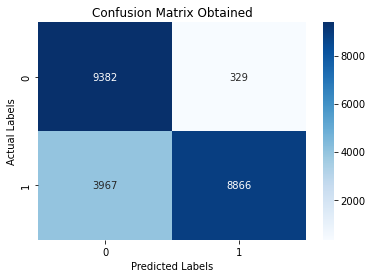

Accuarcy value obtained is  0.8094
F1-score obtained is  0.805
Precision obtained is  0.9642
Recall obtained is  0.6909


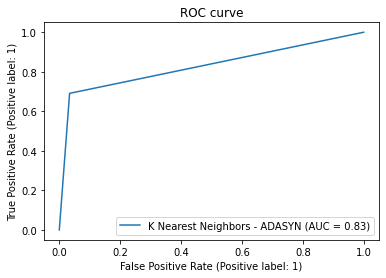

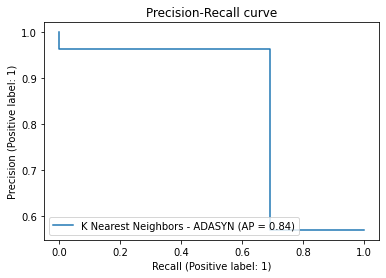

In [13]:
knn = KNeighborsClassifier(n_neighbors=1)
dt = DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=5,random_state=0)
rfe = RFE(dt, n_features_to_select=28)
knn_rfe_pipeline = Pipeline([('rfe', rfe), ('knn', knn)])
knn_rfe_pipeline.fit(processed_adasyn_train_data_trX,processed_adasyn_train_data_trY)
knn_rfe_pipeline_yPred = knn_rfe_pipeline.predict(processed_test_data_X)
knn_list = ["K Nearest Neighbors - ADASYN after Hyperparameter Tuning and Feature Selection based on Recursive Feature Elimination"]
knn_list.extend(print_metrics(processed_test_data_Y, knn_rfe_pipeline_yPred,"K Nearest Neighbors - ADASYN"))
best_results_table.append(knn_list)

In [18]:
pickle.dump(knn_rfe_pipeline, open('knn_rfe_pipeline.pkl', 'wb'))

In [15]:
#Tabulating the obtained results and displaying the results by formatting
baselearners_df = pd.DataFrame(best_results_table, columns = ["Classifier","accuracy","f1-score","Precision","Recall"])
with pd.option_context('display.precision', 4):
    formatted_table=(baselearners_df.style.background_gradient(cmap ='RdYlGn'))
formatted_table

,Classifier,accuracy,f1-score,Precision,Recall
0,Gaussian Naive Bayes - ADASYN after Hyperparameter Tuning and Feature Selection based on Sequential Feature Selection,0.7992,0.8026,0.9114,0.7170
1,Decision Tree - ADASYN after Hyperparameter Tuning and Feature Selection based on Recursive Feature Elimination,0.8310,0.8375,0.9252,0.7650
2,Logistic Regression - ADASYN after Hyperparameter Tuning and Feature Selection based on Recursive Feature Elimination,0.7990,0.8015,0.9152,0.7130
3,K Nearest Neighbors - ADASYN after Hyperparameter Tuning and Feature Selection based on Recursive Feature Elimination,0.8094,0.8050,0.9642,0.6909


In [20]:
gnb_sfs = pickle.load(open('gnb_sfs_pipeline.pkl', 'rb'))
dt_rfe = pickle.load(open('dt_rfe_pipeline.pkl', 'rb'))
logreg_rfe = pickle.load(open('logreg_rfe_pipeline.pkl', 'rb'))
knn_rfe = pickle.load(open('knn_rfe_pipeline.pkl', 'rb'))
stack_estimators = [gnb_sfs,dt_rfe,logreg_rfe,knn_rfe]
# stack_estimators = [gnb_sfs_pipeline,dt_rfe_pipeline,logreg_rfe_pipeline,knn_rfe_pipeline] - This can be used instead of above 5 lines
stack_estimators = {str(model)+"_pipeline" : estimator for estimator, model in zip(stack_estimators,["gnb","dt","logreg","knn"])}
print(stack_estimators)

{'gnb_pipeline': Pipeline(steps=[('sfs',
                 SequentialFeatureSelector(estimator=GaussianNB(),
                                           n_features_to_select=23)),
                ('gnb', GaussianNB())]), 'dt_pipeline': Pipeline(steps=[('rfe',
                 RFE(estimator=DecisionTreeClassifier(criterion='entropy',
                                                      max_depth=20,
                                                      min_samples_leaf=5,
                                                      random_state=0),
                     n_features_to_select=25)),
                ('dt',
                 DecisionTreeClassifier(criterion='entropy', max_depth=20,
                                        min_samples_leaf=5, random_state=0))]), 'logreg_pipeline': Pipeline(steps=[('rfe',
                 RFE(estimator=LogisticRegression(C=0.012742749857031334,
                                                  max_iter=1000, penalty='l1',
                                

In [24]:
# stack_results = dict()
# stack_results_table = []
# for model,model_name in zip([RandomForestClassifier(random_state=rs),AdaBoostClassifier(random_state = rs),XGBClassifier(objective="binary:logistic", random_state=rs, n_jobs = -1),GradientBoostingClassifier(random_state = rs)],["Random Forest","AdaBoost","XGBosost","Gradient-Boosted Decision Tree"]):
#     stacking = StackingClassifier([(estName, clone(est)) for estName, est in stack_estimators.items()], model, n_jobs=-1)
#     stacking.fit(processed_adasyn_train_data_trX, processed_adasyn_train_data_trY)
#     stack_results[f'{model.__class__.__name__}'+"_yPred"] = stacking.predict(processed_test_data)
#     stack_list = [f'{model.__class__.__name__}'+" - Stacking Classifier"]
#     print("Results when {} is used as Stacking Classifier".format(model_name))
#     stack_list.extend(print_metrics(processed_test_data_Y, stack_results[f'{model.__class__.__name__}'+"_yPred"], f'{model.__class__.__name__}'+" - Stacking Classifier"))
#     stack_results_table.append(stack_list)

In [29]:
stack_results = dict()
stack_results_table = []

Results when Random Forest is used as Stacking Classifier


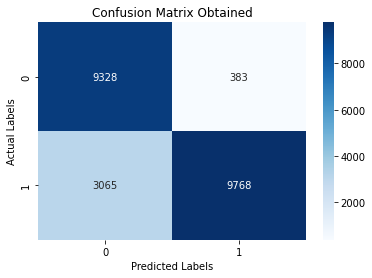

Accuarcy value obtained is  0.8471
F1-score obtained is  0.85
Precision obtained is  0.9623
Recall obtained is  0.7612


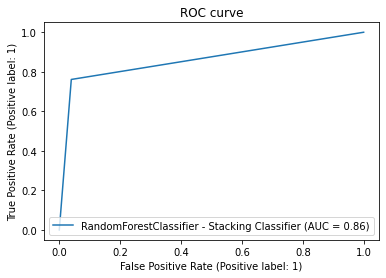

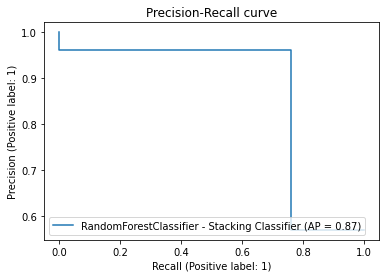

In [30]:
for model,model_name in zip([RandomForestClassifier(random_state=rs)],["Random Forest"]):
    stacking = StackingClassifier([(estName, clone(est)) for estName, est in stack_estimators.items()], model)
    stacking.fit(processed_adasyn_train_data_trX, processed_adasyn_train_data_trY)
    stack_results[f'{model.__class__.__name__}'+"_yPred"] = stacking.predict(processed_test_data_X)
    stack_list = [f'{model.__class__.__name__}'+" - Stacking Classifier"]
    print("Results when {} is used as Stacking Classifier".format(model_name))
    stack_list.extend(print_metrics(processed_test_data_Y, stack_results[f'{model.__class__.__name__}'+"_yPred"], f'{model.__class__.__name__}'+" - Stacking Classifier"))
    stack_results_table.append(stack_list)

In [31]:
pickle.dump(stacking, open('randomforest_stackingclassifier.pkl', 'wb'))

Results when AdaBoost is used as Stacking Classifier


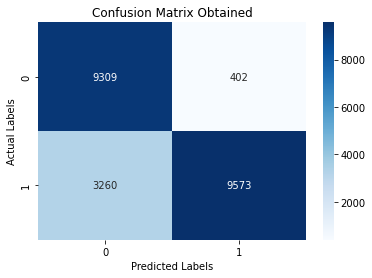

Accuarcy value obtained is  0.8376
F1-score obtained is  0.8394
Precision obtained is  0.9597
Recall obtained is  0.746


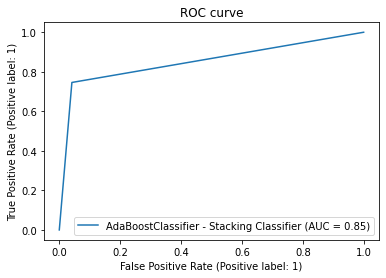

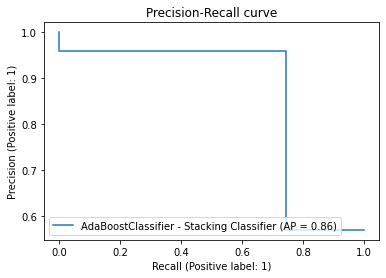

In [32]:
for model,model_name in zip([AdaBoostClassifier(random_state = rs)],["AdaBoost"]):
    stacking = StackingClassifier([(estName, clone(est)) for estName, est in stack_estimators.items()], model)
    stacking.fit(processed_adasyn_train_data_trX, processed_adasyn_train_data_trY)
    stack_results[f'{model.__class__.__name__}'+"_yPred"] = stacking.predict(processed_test_data_X)
    stack_list = [f'{model.__class__.__name__}'+" - Stacking Classifier"]
    print("Results when {} is used as Stacking Classifier".format(model_name))
    stack_list.extend(print_metrics(processed_test_data_Y, stack_results[f'{model.__class__.__name__}'+"_yPred"], f'{model.__class__.__name__}'+" - Stacking Classifier"))
    stack_results_table.append(stack_list)

In [33]:
pickle.dump(stacking, open('adaboost_stackingclassifier.pkl', 'wb'))

[22:56:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Results when XGBoost is used as Stacking Classifier


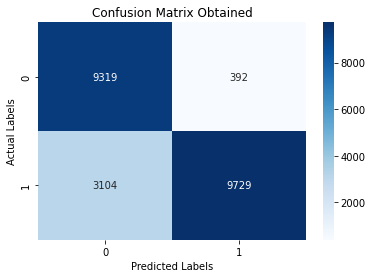

Accuarcy value obtained is  0.8449
F1-score obtained is  0.8477
Precision obtained is  0.9613
Recall obtained is  0.7581


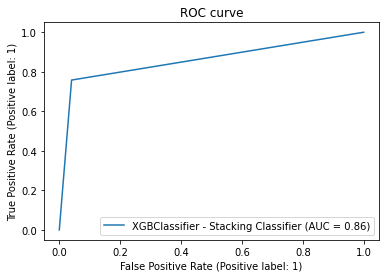

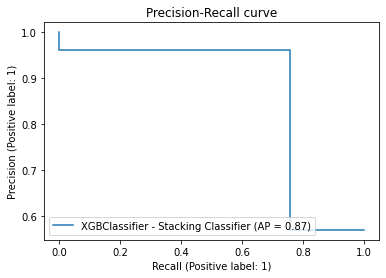

In [35]:
for model,model_name in zip([XGBClassifier(objective="binary:logistic", random_state=rs)],["XGBoost"]):
    stacking = StackingClassifier([(estName, clone(est)) for estName, est in stack_estimators.items()], model)
    stacking.fit(processed_adasyn_train_data_trX, processed_adasyn_train_data_trY)
    stack_results[f'{model.__class__.__name__}'+"_yPred"] = stacking.predict(processed_test_data_X)
    stack_list = [f'{model.__class__.__name__}'+" - Stacking Classifier"]
    print("Results when {} is used as Stacking Classifier".format(model_name))
    stack_list.extend(print_metrics(processed_test_data_Y, stack_results[f'{model.__class__.__name__}'+"_yPred"], f'{model.__class__.__name__}'+" - Stacking Classifier"))
    stack_results_table.append(stack_list)

In [36]:
pickle.dump(stacking, open('xgboost_stackingclassifier.pkl', 'wb'))

Results when Gradient-Boosted Decision Tree is used as Stacking Classifier


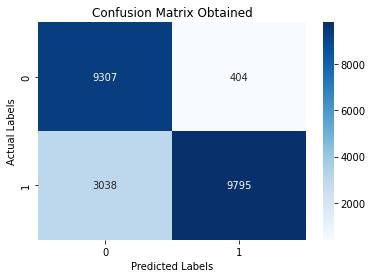

Accuarcy value obtained is  0.8473
F1-score obtained is  0.8506
Precision obtained is  0.9604
Recall obtained is  0.7633


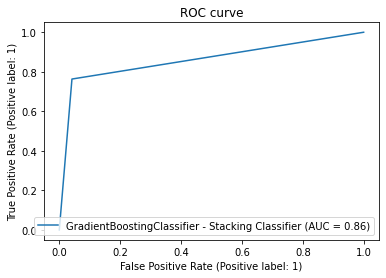

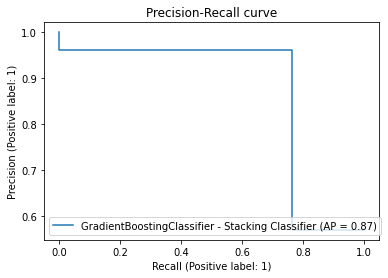

In [37]:
for model,model_name in zip([GradientBoostingClassifier(random_state = rs)],["Gradient-Boosted Decision Tree"]):
    stacking = StackingClassifier([(estName, clone(est)) for estName, est in stack_estimators.items()], model)
    stacking.fit(processed_adasyn_train_data_trX, processed_adasyn_train_data_trY)
    stack_results[f'{model.__class__.__name__}'+"_yPred"] = stacking.predict(processed_test_data_X)
    stack_list = [f'{model.__class__.__name__}'+" - Stacking Classifier"]
    print("Results when {} is used as Stacking Classifier".format(model_name))
    stack_list.extend(print_metrics(processed_test_data_Y, stack_results[f'{model.__class__.__name__}'+"_yPred"], f'{model.__class__.__name__}'+" - Stacking Classifier"))
    stack_results_table.append(stack_list)

In [38]:
pickle.dump(stacking, open('gbdt_stackingclassifier.pkl', 'wb'))

In [46]:
stack_results_table

[['RandomForestClassifier - Stacking Classifier',
  0.8471,
  0.85,
  0.9623,
  0.7612],
 ['AdaBoostClassifier - Stacking Classifier', 0.8376, 0.8394, 0.9597, 0.746],
 ['XGBClassifier - Stacking Classifier', 0.8449, 0.8477, 0.9613, 0.7581],
 ['GradientBoostingClassifier - Stacking Classifier',
  0.8473,
  0.8506,
  0.9604,
  0.7633]]

In [47]:
#Tabulating the obtained results and displaying the results by formatting
stackingclassifiers_df = pd.DataFrame(stack_results_table, columns = ["Classifier","accuracy","f1-score","Precision","Recall"])
with pd.option_context('display.precision', 4):
    formatted_table=(stackingclassifiers_df.style.background_gradient(cmap ='RdYlGn'))
formatted_table

,Classifier,accuracy,f1-score,Precision,Recall
0,RandomForestClassifier - Stacking Classifier,0.8471,0.8500,0.9623,0.7612
1,AdaBoostClassifier - Stacking Classifier,0.8376,0.8394,0.9597,0.7460
2,XGBClassifier - Stacking Classifier,0.8449,0.8477,0.9613,0.7581
3,GradientBoostingClassifier - Stacking Classifier,0.8473,0.8506,0.9604,0.7633


In [48]:
stack_results

{'RandomForestClassifier_yPred': array([1, 1, 0, ..., 1, 0, 1], dtype=int64),
 'AdaBoostClassifier_yPred': array([1, 1, 0, ..., 1, 0, 1], dtype=int64),
 'XGBClassifier_yPred': array([1, 1, 0, ..., 1, 0, 1], dtype=int64),
 'GradientBoostingClassifier_yPred': array([1, 1, 0, ..., 1, 0, 1], dtype=int64)}

Logical OR between Stacking Classifiers followed by deriving threshold for Voting

In [49]:
def utility_logical_or(col_a, col_b):
    output = []
    for a, b in zip(col_a, col_b):
        if (a + b >= 1):
            output.append(1)
        else:
            output.append(0)
    return output

In [56]:
randomforest_stackingclassifier = pickle.load(open('randomforest_stackingclassifier.pkl', 'rb'))
adaboost_stackingclassifier = pickle.load(open('adaboost_stackingclassifier.pkl', 'rb'))
xgboost_stackingclassifier = pickle.load(open('xgboost_stackingclassifier.pkl', 'rb'))
gbdt_stackingclassifier = pickle.load(open('gbdt_stackingclassifier.pkl', 'rb'))

train_predictions_ind_wrapper_or_df = pd.DataFrame()
train_predictions_ind_wrapper_or_df["Naive Bayes - Base Learner"] = gnb_sfs_pipeline.predict(processed_adasyn_train_data_trX)
train_predictions_ind_wrapper_or_df["Decision Tree - Base Learner"] = dt_rfe_pipeline.predict(processed_adasyn_train_data_trX)
train_predictions_ind_wrapper_or_df["Logistic Regression - Base Learner"] = logreg_rfe_pipeline.predict(processed_adasyn_train_data_trX)
train_predictions_ind_wrapper_or_df["K Nearest Neighbors - Base Learner"] = knn_rfe_pipeline.predict(processed_adasyn_train_data_trX)
train_predictions_ind_wrapper_or_df["Random Forest - Stacking Classifier"] = randomforest_stackingclassifier.predict(processed_adasyn_train_data_trX)
train_predictions_ind_wrapper_or_df["AdaBoost - Stacking Classifier"] = adaboost_stackingclassifier.predict(processed_adasyn_train_data_trX)
train_predictions_ind_wrapper_or_df["XGBoost - Stacking Classifier"] = xgboost_stackingclassifier.predict(processed_adasyn_train_data_trX)
train_predictions_ind_wrapper_or_df["Gradient-Boosted Decision Tree - Stacking Classifier"] = gbdt_stackingclassifier.predict(processed_adasyn_train_data_trX)
train_predictions_ind_wrapper_or_df["RF OR AdaBoost"] = utility_logical_or(train_predictions_ind_wrapper_or_df["Random Forest - Stacking Classifier"].values,train_predictions_ind_wrapper_or_df["AdaBoost - Stacking Classifier"].values)
train_predictions_ind_wrapper_or_df["RF OR XGBoost"] = utility_logical_or(train_predictions_ind_wrapper_or_df["Random Forest - Stacking Classifier"].values,train_predictions_ind_wrapper_or_df["XGBoost - Stacking Classifier"].values)
train_predictions_ind_wrapper_or_df["RF OR GBDT"] = utility_logical_or(train_predictions_ind_wrapper_or_df["Random Forest - Stacking Classifier"].values,train_predictions_ind_wrapper_or_df["Gradient-Boosted Decision Tree - Stacking Classifier"].values)
train_predictions_ind_wrapper_or_df["AdaBoost OR XGBoost"] = utility_logical_or(train_predictions_ind_wrapper_or_df["AdaBoost - Stacking Classifier"].values,train_predictions_ind_wrapper_or_df["XGBoost - Stacking Classifier"].values)
train_predictions_ind_wrapper_or_df["AdaBoost OR GBDT"] = utility_logical_or(train_predictions_ind_wrapper_or_df["AdaBoost - Stacking Classifier"].values,train_predictions_ind_wrapper_or_df["Gradient-Boosted Decision Tree - Stacking Classifier"].values)
train_predictions_ind_wrapper_or_df["XGBoost OR GBDT"] = utility_logical_or(train_predictions_ind_wrapper_or_df["XGBoost - Stacking Classifier"].values,train_predictions_ind_wrapper_or_df["Gradient-Boosted Decision Tree - Stacking Classifier"].values)

In [57]:
train_predictions_ind_wrapper_or_df

,Naive Bayes - Base Learner,Decision Tree - Base Learner,Logistic Regression - Base Learner,K Nearest Neighbors - Base Learner,Random Forest - Stacking Classifier,AdaBoost - Stacking Classifier,XGBoost - Stacking Classifier,Gradient-Boosted Decision Tree - Stacking Classifier,RF OR AdaBoost,RF OR XGBoost,RF OR GBDT,AdaBoost OR XGBoost,AdaBoost OR GBDT,XGBoost OR GBDT
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129736,1,1,1,1,1,1,1,1,1,1,1,1,1,1
129737,1,1,1,1,1,1,1,1,1,1,1,1,1,1
129738,1,1,1,1,1,1,1,1,1,1,1,1,1,1
129739,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [58]:
train_predictions_ind_wrapper_or_df["sum_predictions"] = train_predictions_ind_wrapper_or_df.sum(axis=1)

100%|██████████| 14/14 [00:01<00:00,  8.19it/s]


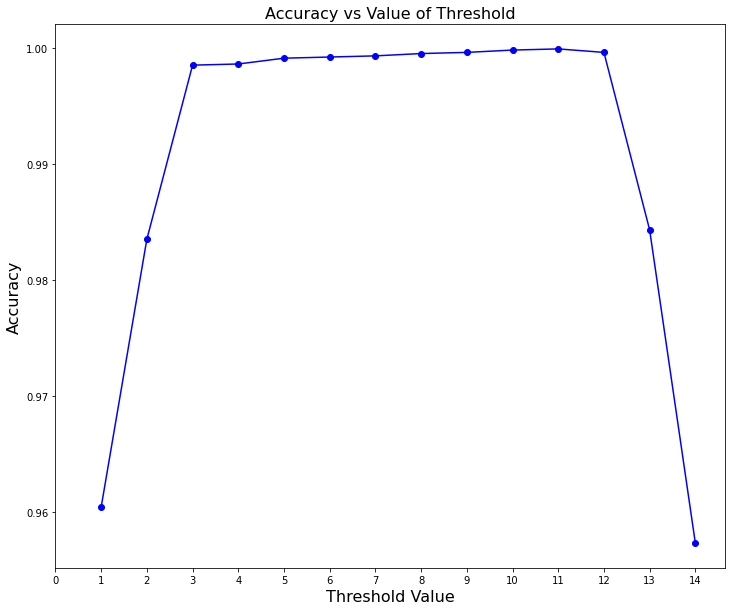

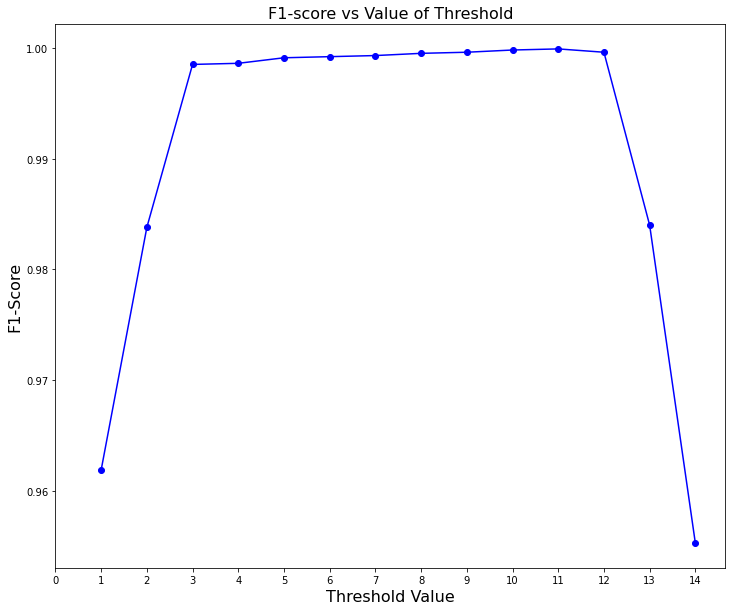

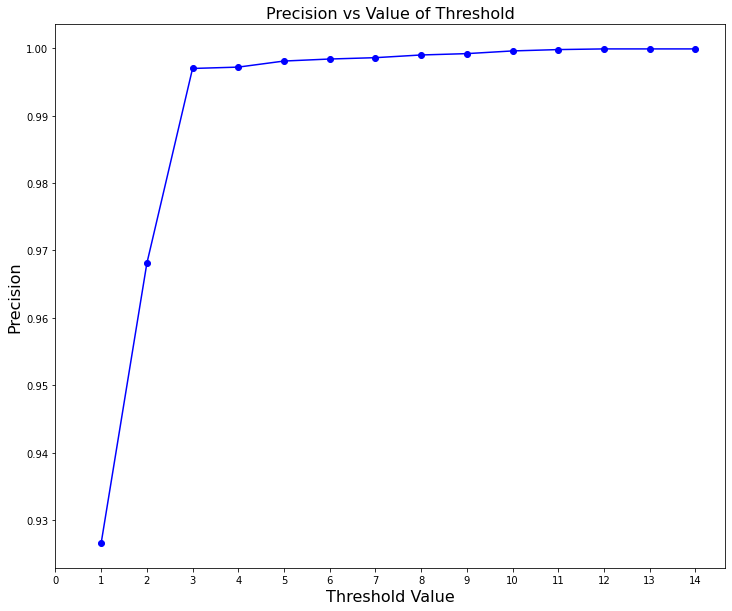

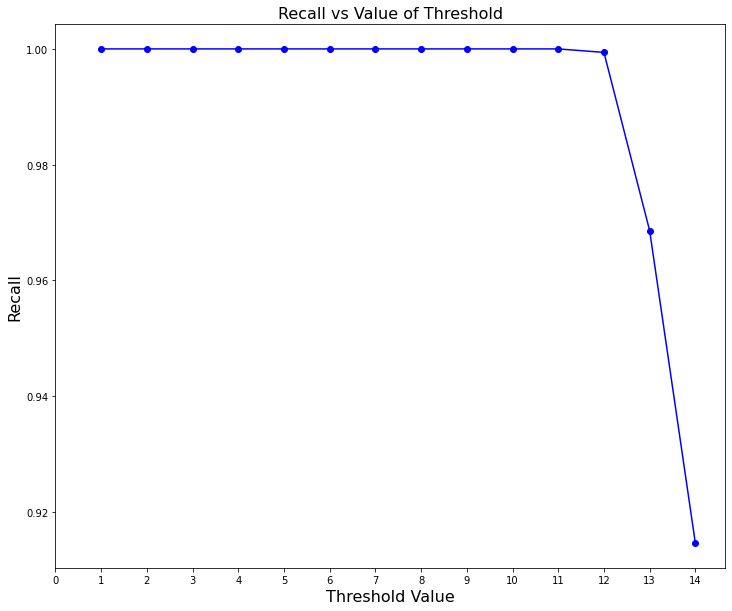

Maximum accuracy obtained is 0.9999 for the threshold value = 11
Maximum f1-score obtained is 0.9999 for the threshold value = 11
Maximum precision obtained is 0.9999 for the threshold value = 12
Maximum recall obtained is 1.0 for the threshold value = 1


In [61]:
acc_dict = {}
f1_dict = {}
prec_dict = {}
recall_dict = {}
for threshold in tqdm(range(1,15)):
    acc_val = []
    f1_val = []
    prec_val = []
    recall_val = []
    yPred = train_predictions_ind_wrapper_or_df["sum_predictions"].apply(lambda x:1 if (x>=threshold) else 0)
    acc_dict[threshold] = round(accuracy_score(processed_adasyn_train_data_trY,yPred),4)
    f1_dict[threshold] = round(f1_score(processed_adasyn_train_data_trY,yPred,labels=np.unique(yPred)),4) 
    prec_dict[threshold] = round(precision_score(processed_adasyn_train_data_trY,yPred,labels=np.unique(yPred)),4)
    recall_dict[threshold] = round(recall_score(processed_adasyn_train_data_trY,yPred,labels=np.unique(yPred)),4)
    
plt.figure(figsize=(12,10))
plt.plot(*zip(*sorted(acc_dict.items())),color='blue',marker='o')
Title = "Accuracy vs Value of Threshold"
plt.title(Title, fontsize=16)
plt.xticks(range(0,15))
plt.xlabel("Threshold Value", fontsize=16)
plt.ylabel("Accuracy", fontsize=16)
plt.show();

plt.figure(figsize=(12,10))
plt.plot(*zip(*sorted(f1_dict.items())),color='blue',marker='o')
Title = "F1-score vs Value of Threshold"
plt.title(Title, fontsize=16)
plt.xticks(range(0,15))
plt.xlabel("Threshold Value", fontsize=16)
plt.ylabel("F1-Score", fontsize=16)
plt.show();


plt.figure(figsize=(12,10))
plt.plot(*zip(*sorted(prec_dict.items())),color='blue',marker='o')
Title = "Precision vs Value of Threshold"
plt.title(Title, fontsize=16)
plt.xticks(range(0,15))
plt.xlabel("Threshold Value", fontsize=16)
plt.ylabel("Precision", fontsize=16)
plt.show();

plt.figure(figsize=(12,10))
plt.plot(*zip(*sorted(recall_dict.items())),color='blue',marker='o')
Title = "Recall vs Value of Threshold"
plt.title(Title, fontsize=16)
plt.xticks(range(0,15))
plt.xlabel("Threshold Value", fontsize=16)
plt.ylabel("Recall", fontsize=16)
plt.show();

max_acc = max(acc_dict.values())
max_acc_threshold =  max(acc_dict, key=acc_dict.get)

max_f1 = max(f1_dict.values())
max_f1_threshold=  max(f1_dict, key=f1_dict.get)

max_precision = max(prec_dict.values())
max_prec_threshold = max(prec_dict, key=prec_dict.get)

max_recall = max(recall_dict.values())
max_recall_threshold = max(recall_dict, key=recall_dict.get)


print("Maximum accuracy obtained is {} for the threshold value = {}".format(max_acc,max_acc_threshold))
print("Maximum f1-score obtained is {} for the threshold value = {}".format(max_f1,max_f1_threshold))
print("Maximum precision obtained is {} for the threshold value = {}".format(max_precision,max_prec_threshold))
print("Maximum recall obtained is {} for the threshold value = {}".format(max_recall,max_recall_threshold))

In [95]:
threshold = 1
print("Accuracy at threshold value {} is {}".format(threshold,acc_dict[threshold]))
print("F1-Score at threshold value {} is {}".format(threshold,f1_dict[threshold]))
print("Precision at threshold value {} is {}".format(threshold,prec_dict[threshold]))
print("Recall at threshold value {} is {}".format(threshold,recall_dict[threshold]))

Accuracy at threshold value 1 is 0.9604
F1-Score at threshold value 1 is 0.9619
Precision at threshold value 1 is 0.9266
Recall at threshold value 1 is 1.0


In [65]:
threshold = 11
print("Accuracy at threshold value {} is {}".format(threshold,acc_dict[threshold]))
print("F1-Score at threshold value {} is {}".format(threshold,f1_dict[threshold]))
print("Precision at threshold value {} is {}".format(threshold,prec_dict[threshold]))
print("Recall at threshold value {} is {}".format(threshold,recall_dict[threshold]))

Accuracy at threshold value 11 is 0.9999
F1-Score at threshold value 11 is 0.9999
Precision at threshold value 11 is 0.9998
Recall at threshold value 11 is 1.0


In [66]:
threshold = 12
print("Accuracy at threshold value {} is {}".format(threshold,acc_dict[threshold]))
print("F1-Score at threshold value {} is {}".format(threshold,f1_dict[threshold]))
print("Precision at threshold value {} is {}".format(threshold,prec_dict[threshold]))
print("Recall at threshold value {} is {}".format(threshold,recall_dict[threshold]))

Accuracy at threshold value 12 is 0.9996
F1-Score at threshold value 12 is 0.9996
Precision at threshold value 12 is 0.9999
Recall at threshold value 12 is 0.9994


In [67]:
test_predictions_ind_wrapper_or_df = pd.DataFrame()
test_predictions_ind_wrapper_or_df["Naive Bayes - Base Learner"] = gnb_sfs_pipeline_yPred
test_predictions_ind_wrapper_or_df["Decision Tree - Base Learner"] = dt_rfe_pipeline_yPred
test_predictions_ind_wrapper_or_df["Logistic Regression - Base Learner"] = logreg_rfe_pipeline_yPred
test_predictions_ind_wrapper_or_df["K Nearest Neighbors - Base Learner"] = knn_rfe_pipeline_yPred
test_predictions_ind_wrapper_or_df["Random Forest - Stacking Classifier"] = stack_results["RandomForestClassifier_yPred"]
test_predictions_ind_wrapper_or_df["AdaBoost - Stacking Classifier"] = stack_results["AdaBoostClassifier_yPred"]
test_predictions_ind_wrapper_or_df["XGBoost - Stacking Classifier"] = stack_results["XGBClassifier_yPred"]
test_predictions_ind_wrapper_or_df["Gradient-Boosted Decision Tree - Stacking Classifier"] = stack_results["GradientBoostingClassifier_yPred"]
test_predictions_ind_wrapper_or_df["RF OR AdaBoost"] = utility_logical_or(test_predictions_ind_wrapper_or_df["Random Forest - Stacking Classifier"].values,test_predictions_ind_wrapper_or_df["AdaBoost - Stacking Classifier"].values)
test_predictions_ind_wrapper_or_df["RF OR XGBoost"] = utility_logical_or(test_predictions_ind_wrapper_or_df["Random Forest - Stacking Classifier"].values,test_predictions_ind_wrapper_or_df["XGBoost - Stacking Classifier"].values)
test_predictions_ind_wrapper_or_df["RF OR GBDT"] = utility_logical_or(test_predictions_ind_wrapper_or_df["Random Forest - Stacking Classifier"].values,test_predictions_ind_wrapper_or_df["Gradient-Boosted Decision Tree - Stacking Classifier"].values)
test_predictions_ind_wrapper_or_df["AdaBoost OR XGBoost"] = utility_logical_or(test_predictions_ind_wrapper_or_df["AdaBoost - Stacking Classifier"].values,test_predictions_ind_wrapper_or_df["XGBoost - Stacking Classifier"].values)
test_predictions_ind_wrapper_or_df["AdaBoost OR GBDT"] = utility_logical_or(test_predictions_ind_wrapper_or_df["AdaBoost - Stacking Classifier"].values,test_predictions_ind_wrapper_or_df["Gradient-Boosted Decision Tree - Stacking Classifier"].values)
test_predictions_ind_wrapper_or_df["XGBoost OR GBDT"] = utility_logical_or(test_predictions_ind_wrapper_or_df["XGBoost - Stacking Classifier"].values,test_predictions_ind_wrapper_or_df["Gradient-Boosted Decision Tree - Stacking Classifier"].values)

In [68]:
test_predictions_ind_wrapper_or_df["sum_predictions"] = test_predictions_ind_wrapper_or_df.sum(axis=1)

In [69]:
or_logic_stacking_table = []

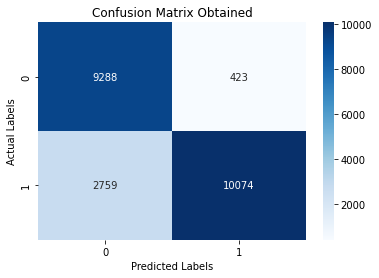

Accuarcy value obtained is  0.8589
F1-score obtained is  0.8636
Precision obtained is  0.9597
Recall obtained is  0.785


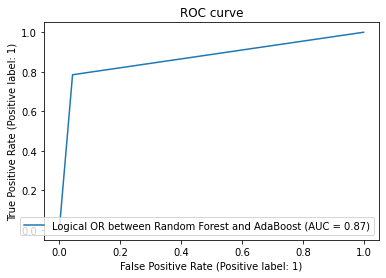

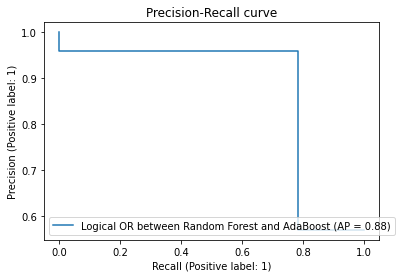

In [71]:
text = "Logical OR between Random Forest and AdaBoost"
or_logic_stacking_list = [text]
or_logic_stacking_list.extend(print_metrics(processed_test_data_Y,test_predictions_ind_wrapper_or_df["RF OR AdaBoost"].values,text))
or_logic_stacking_table.append(or_logic_stacking_list)

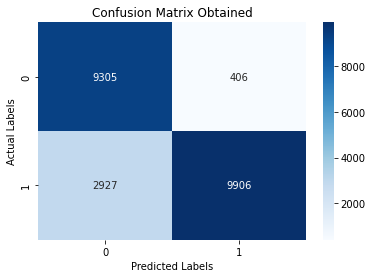

Accuarcy value obtained is  0.8522
F1-score obtained is  0.856
Precision obtained is  0.9606
Recall obtained is  0.7719


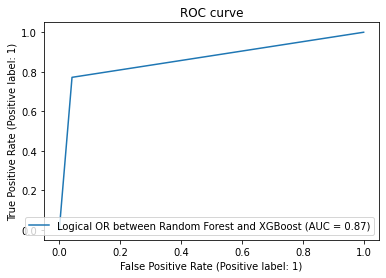

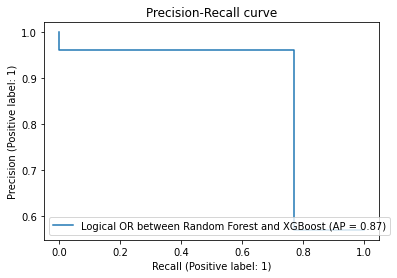

In [72]:
text = "Logical OR between Random Forest and XGBoost"
or_logic_stacking_list = [text]
or_logic_stacking_list.extend(print_metrics(processed_test_data_Y,test_predictions_ind_wrapper_or_df["RF OR XGBoost"].values,text))
or_logic_stacking_table.append(or_logic_stacking_list)

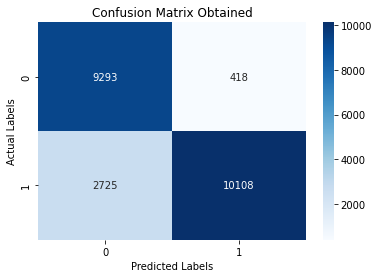

Accuarcy value obtained is  0.8606
F1-score obtained is  0.8654
Precision obtained is  0.9603
Recall obtained is  0.7877


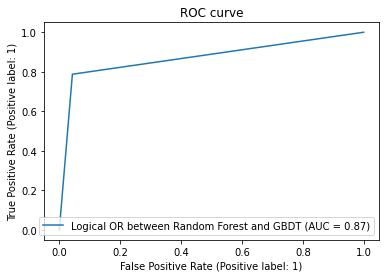

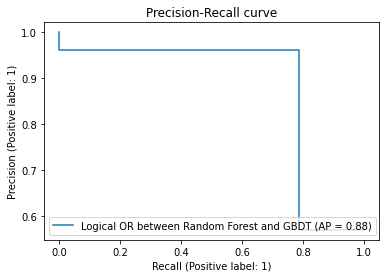

In [73]:
text = "Logical OR between Random Forest and GBDT"
or_logic_stacking_list = [text]
or_logic_stacking_list.extend(print_metrics(processed_test_data_Y,test_predictions_ind_wrapper_or_df["RF OR GBDT"].values,text))
or_logic_stacking_table.append(or_logic_stacking_list)

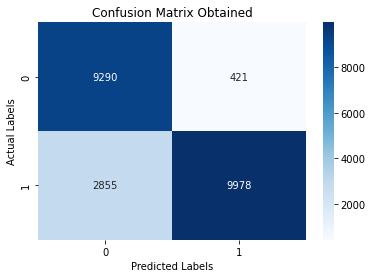

Accuarcy value obtained is  0.8547
F1-score obtained is  0.859
Precision obtained is  0.9595
Recall obtained is  0.7775


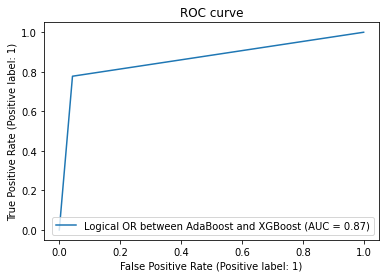

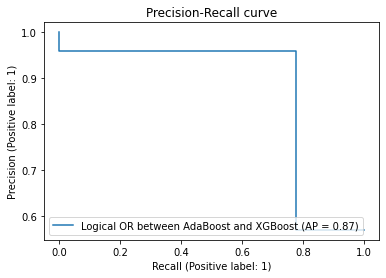

In [74]:
text = "Logical OR between AdaBoost and XGBoost"
or_logic_stacking_list = [text]
or_logic_stacking_list.extend(print_metrics(processed_test_data_Y,test_predictions_ind_wrapper_or_df["AdaBoost OR XGBoost"].values,text))
or_logic_stacking_table.append(or_logic_stacking_list)

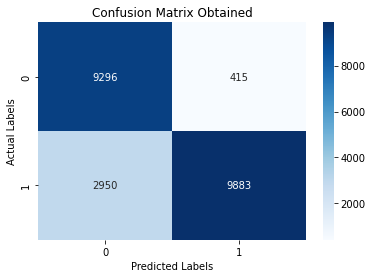

Accuarcy value obtained is  0.8507
F1-score obtained is  0.8545
Precision obtained is  0.9597
Recall obtained is  0.7701


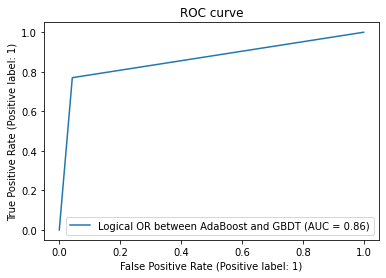

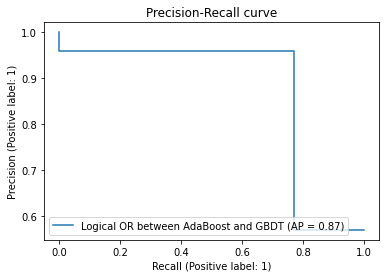

In [75]:
text = "Logical OR between AdaBoost and GBDT"
or_logic_stacking_list = [text]
or_logic_stacking_list.extend(print_metrics(processed_test_data_Y,test_predictions_ind_wrapper_or_df["AdaBoost OR GBDT"].values,text))
or_logic_stacking_table.append(or_logic_stacking_list)

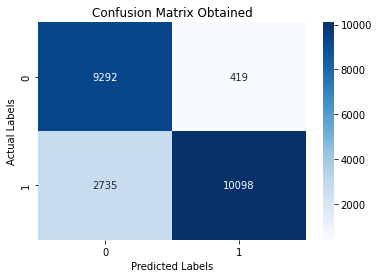

Accuarcy value obtained is  0.8601
F1-score obtained is  0.8649
Precision obtained is  0.9602
Recall obtained is  0.7869


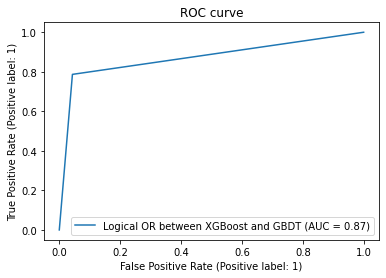

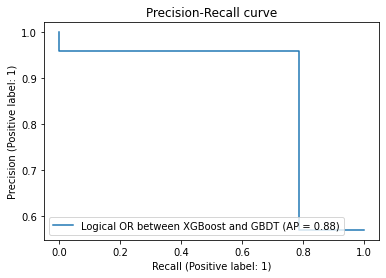

In [76]:
text = "Logical OR between XGBoost and GBDT"
or_logic_stacking_list = [text]
or_logic_stacking_list.extend(print_metrics(processed_test_data_Y,test_predictions_ind_wrapper_or_df["XGBoost OR GBDT"].values,text))
or_logic_stacking_table.append(or_logic_stacking_list)

In [77]:
or_logic_stacking_table

[['Logical OR between Random Forest and AdaBoost',
  0.8589,
  0.8636,
  0.9597,
  0.785],
 ['Logical OR between Random Forest and XGBoost',
  0.8522,
  0.856,
  0.9606,
  0.7719],
 ['Logical OR between Random Forest and GBDT', 0.8606, 0.8654, 0.9603, 0.7877],
 ['Logical OR between AdaBoost and XGBoost', 0.8547, 0.859, 0.9595, 0.7775],
 ['Logical OR between AdaBoost and GBDT', 0.8507, 0.8545, 0.9597, 0.7701],
 ['Logical OR between XGBoost and GBDT', 0.8601, 0.8649, 0.9602, 0.7869]]

In [78]:
#Tabulating the obtained results and displaying the results by formatting
logical_or_df = pd.DataFrame(or_logic_stacking_table, columns = ["Logical OR between Classifiers","accuracy","f1-score","Precision","Recall"])
with pd.option_context('display.precision', 4):
    formatted_table=(logical_or_df.style.background_gradient(cmap ='RdYlGn'))
formatted_table

,Logical OR between Classifiers,accuracy,f1-score,Precision,Recall
0,Logical OR between Random Forest and AdaBoost,0.8589,0.8636,0.9597,0.7850
1,Logical OR between Random Forest and XGBoost,0.8522,0.8560,0.9606,0.7719
2,Logical OR between Random Forest and GBDT,0.8606,0.8654,0.9603,0.7877
3,Logical OR between AdaBoost and XGBoost,0.8547,0.8590,0.9595,0.7775
4,Logical OR between AdaBoost and GBDT,0.8507,0.8545,0.9597,0.7701
5,Logical OR between XGBoost and GBDT,0.8601,0.8649,0.9602,0.7869


In [96]:
ind_wrapper_or_table = []

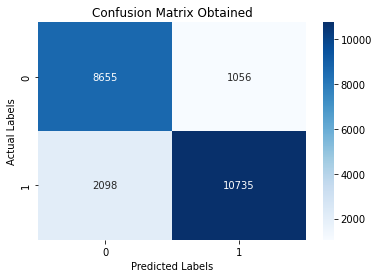

Accuarcy value obtained is  0.8601
F1-score obtained is  0.8719
Precision obtained is  0.9104
Recall obtained is  0.8365


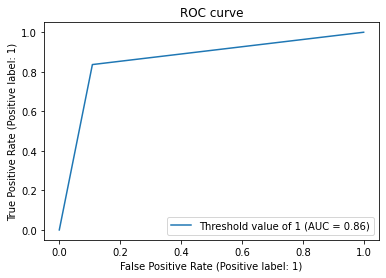

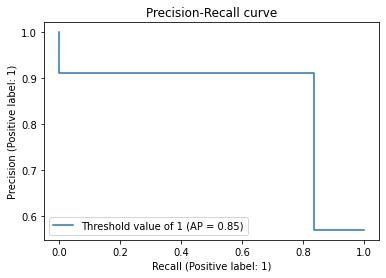

In [97]:
threshold = 1
test_predictions_ind_wrapper_or_df["final_prediction"] = test_predictions_ind_wrapper_or_df["sum_predictions"].apply(lambda x:1 if (x>=threshold) else 0)
ind_wrapper_or_list = ["Threshold value of {} while voting on various predictions".format(threshold)]
ind_wrapper_or_list.extend(print_metrics(processed_test_data_Y,test_predictions_ind_wrapper_or_df["final_prediction"].values,"Threshold value of {}".format(threshold)))
ind_wrapper_or_table.append(ind_wrapper_or_list)

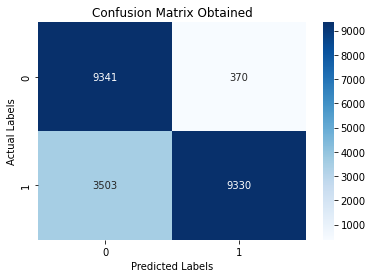

Accuarcy value obtained is  0.8282
F1-score obtained is  0.8281
Precision obtained is  0.9619
Recall obtained is  0.727


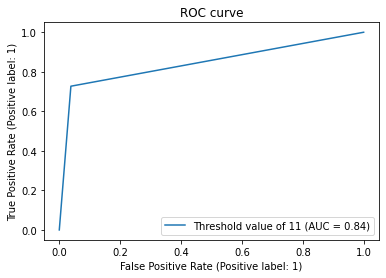

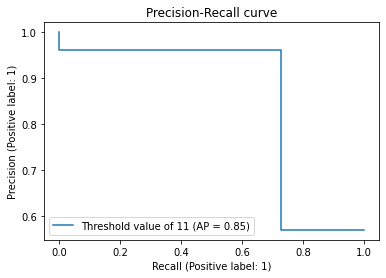

In [98]:
threshold = 11
test_predictions_ind_wrapper_or_df["final_prediction"] = test_predictions_ind_wrapper_or_df["sum_predictions"].apply(lambda x:1 if (x>=threshold) else 0)
ind_wrapper_or_list = ["Threshold value of {} while voting on various predictions".format(threshold)]
ind_wrapper_or_list.extend(print_metrics(processed_test_data_Y,test_predictions_ind_wrapper_or_df["final_prediction"].values,"Threshold value of {}".format(threshold)))
ind_wrapper_or_table.append(ind_wrapper_or_list)

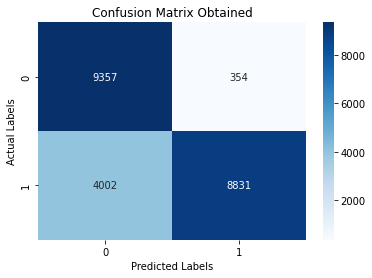

Accuarcy value obtained is  0.8068
F1-score obtained is  0.8022
Precision obtained is  0.9615
Recall obtained is  0.6881


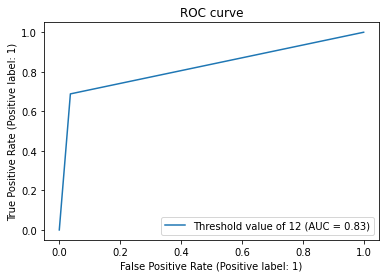

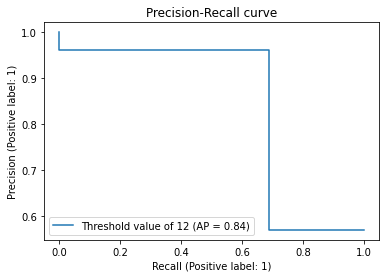

In [99]:
threshold = 12
test_predictions_ind_wrapper_or_df["final_prediction"] = test_predictions_ind_wrapper_or_df["sum_predictions"].apply(lambda x:1 if (x>=threshold) else 0)
ind_wrapper_or_list = ["Threshold value of {} while voting on various predictions".format(threshold)]
ind_wrapper_or_list.extend(print_metrics(processed_test_data_Y,test_predictions_ind_wrapper_or_df["final_prediction"].values,"Threshold value of {}".format(threshold)))
ind_wrapper_or_table.append(ind_wrapper_or_list)

In [100]:
ind_wrapper_or_table

[['Threshold value of 1 while voting on various predictions',
  0.8601,
  0.8719,
  0.9104,
  0.8365],
 ['Threshold value of 11 while voting on various predictions',
  0.8282,
  0.8281,
  0.9619,
  0.727],
 ['Threshold value of 12 while voting on various predictions',
  0.8068,
  0.8022,
  0.9615,
  0.6881]]

In [101]:
#Tabulating the obtained results and displaying the results by formatting
ind_wrapper_or_table_df = pd.DataFrame(ind_wrapper_or_table, columns = ["Threshold value","accuracy","f1-score","Precision","Recall"])
with pd.option_context('display.precision', 4):
    formatted_table=(ind_wrapper_or_table_df.style.background_gradient(cmap ='RdYlGn'))
formatted_table

,Threshold value,accuracy,f1-score,Precision,Recall
0,Threshold value of 1 while voting on various predictions,0.8601,0.8719,0.9104,0.8365
1,Threshold value of 11 while voting on various predictions,0.8282,0.8281,0.9619,0.7270
2,Threshold value of 12 while voting on various predictions,0.8068,0.8022,0.9615,0.6881


Logical AND between Stacking Classifiers and deriving threshold for Voting

In [102]:
def utility_logical_and(col_a, col_b):
    output = []
    for a, b in zip(col_a, col_b):
        if (a==1 and b==1):
            output.append(1)
        else:
            output.append(0)
    return output

In [103]:
train_predictions_ind_wrapper_and_df = pd.DataFrame()
train_predictions_ind_wrapper_and_df["Naive Bayes - Base Learner"] = train_predictions_ind_wrapper_or_df["Naive Bayes - Base Learner"]
train_predictions_ind_wrapper_and_df["Decision Tree - Base Learner"] = train_predictions_ind_wrapper_or_df["Decision Tree - Base Learner"]
train_predictions_ind_wrapper_and_df["Logistic Regression - Base Learner"] = train_predictions_ind_wrapper_or_df["Logistic Regression - Base Learner"]
train_predictions_ind_wrapper_and_df["K Nearest Neighbors - Base Learner"] = train_predictions_ind_wrapper_or_df["K Nearest Neighbors - Base Learner"]
train_predictions_ind_wrapper_and_df["Random Forest - Stacking Classifier"] = train_predictions_ind_wrapper_or_df["Random Forest - Stacking Classifier"]
train_predictions_ind_wrapper_and_df["AdaBoost - Stacking Classifier"] = train_predictions_ind_wrapper_or_df["AdaBoost - Stacking Classifier"]
train_predictions_ind_wrapper_and_df["XGBoost - Stacking Classifier"] = train_predictions_ind_wrapper_or_df["XGBoost - Stacking Classifier"]
train_predictions_ind_wrapper_and_df["Gradient-Boosted Decision Tree - Stacking Classifier"] = train_predictions_ind_wrapper_or_df["Gradient-Boosted Decision Tree - Stacking Classifier"]
train_predictions_ind_wrapper_and_df["RF AND AdaBoost"] = utility_logical_and(train_predictions_ind_wrapper_and_df["Random Forest - Stacking Classifier"].values,train_predictions_ind_wrapper_and_df["AdaBoost - Stacking Classifier"].values)
train_predictions_ind_wrapper_and_df["RF AND XGBoost"] = utility_logical_and(train_predictions_ind_wrapper_and_df["Random Forest - Stacking Classifier"].values,train_predictions_ind_wrapper_and_df["XGBoost - Stacking Classifier"].values)
train_predictions_ind_wrapper_and_df["RF AND GBDT"] = utility_logical_and(train_predictions_ind_wrapper_and_df["Random Forest - Stacking Classifier"].values,train_predictions_ind_wrapper_and_df["Gradient-Boosted Decision Tree - Stacking Classifier"].values)
train_predictions_ind_wrapper_and_df["AdaBoost AND XGBoost"] = utility_logical_and(train_predictions_ind_wrapper_and_df["AdaBoost - Stacking Classifier"].values,train_predictions_ind_wrapper_and_df["XGBoost - Stacking Classifier"].values)
train_predictions_ind_wrapper_and_df["AdaBoost AND GBDT"] = utility_logical_and(train_predictions_ind_wrapper_and_df["AdaBoost - Stacking Classifier"].values,train_predictions_ind_wrapper_and_df["Gradient-Boosted Decision Tree - Stacking Classifier"].values)
train_predictions_ind_wrapper_and_df["XGBoost AND GBDT"] = utility_logical_and(train_predictions_ind_wrapper_and_df["XGBoost - Stacking Classifier"].values,train_predictions_ind_wrapper_and_df["Gradient-Boosted Decision Tree - Stacking Classifier"].values)

In [104]:
train_predictions_ind_wrapper_and_df

,Naive Bayes - Base Learner,Decision Tree - Base Learner,Logistic Regression - Base Learner,K Nearest Neighbors - Base Learner,Random Forest - Stacking Classifier,AdaBoost - Stacking Classifier,XGBoost - Stacking Classifier,Gradient-Boosted Decision Tree - Stacking Classifier,RF AND AdaBoost,RF AND XGBoost,RF AND GBDT,AdaBoost AND XGBoost,AdaBoost AND GBDT,XGBoost AND GBDT
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129736,1,1,1,1,1,1,1,1,1,1,1,1,1,1
129737,1,1,1,1,1,1,1,1,1,1,1,1,1,1
129738,1,1,1,1,1,1,1,1,1,1,1,1,1,1
129739,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [105]:
train_predictions_ind_wrapper_and_df["sum_predictions"] = train_predictions_ind_wrapper_and_df.sum(axis=1)

100%|██████████| 14/14 [00:01<00:00,  7.94it/s]


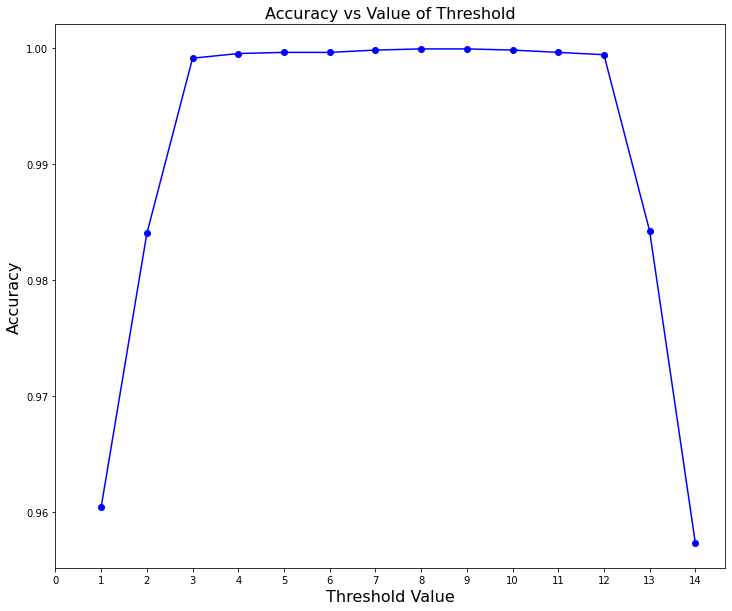

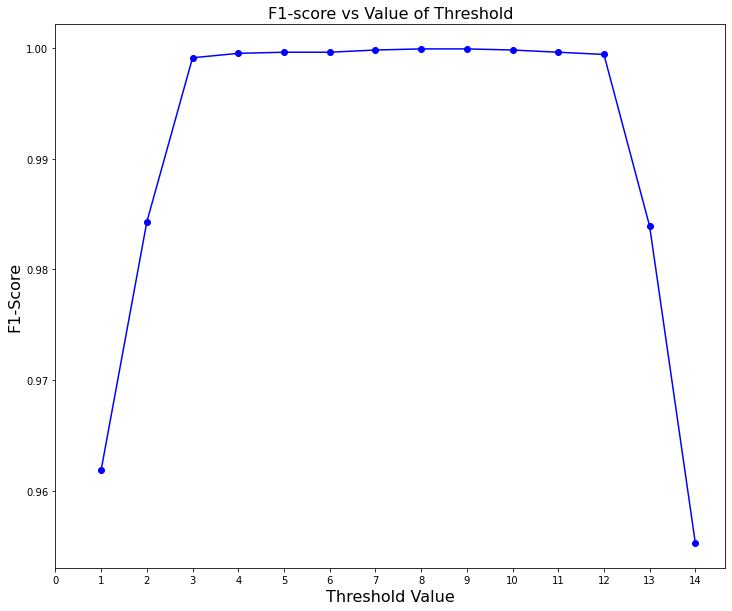

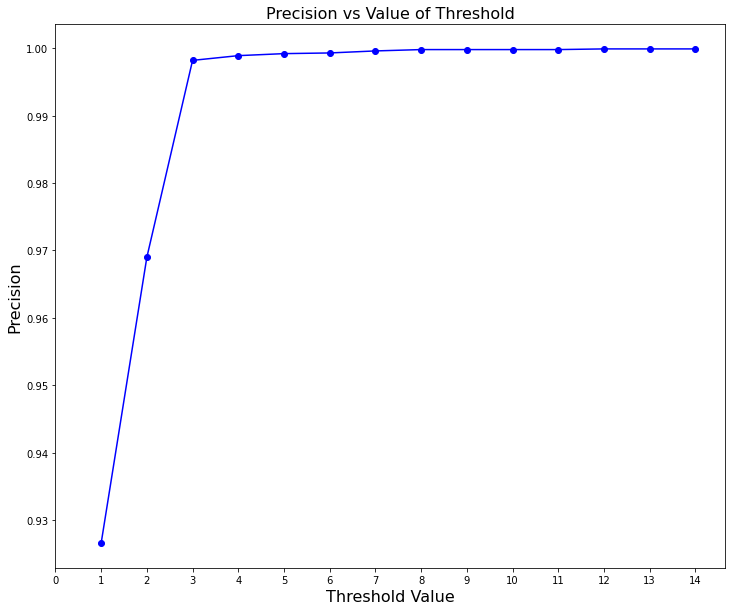

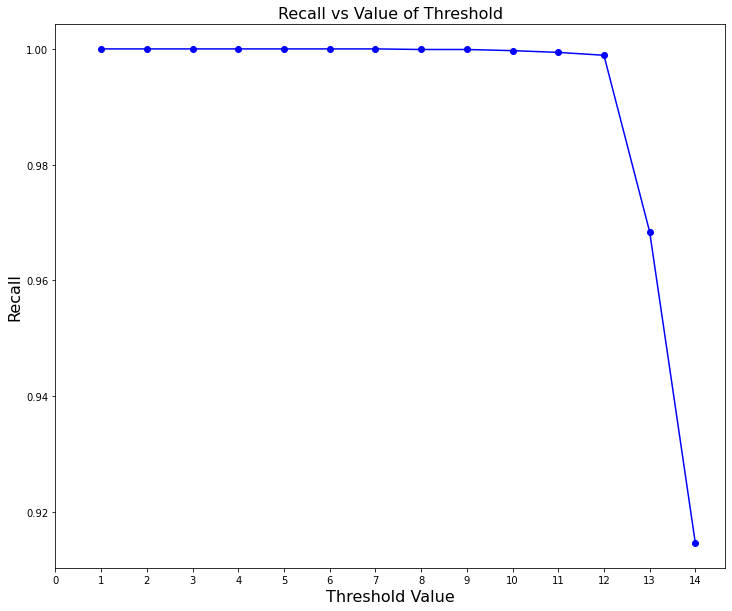

Maximum accuracy obtained is 0.9999 for the threshold value = 8
Maximum f1-score obtained is 0.9999 for the threshold value = 8
Maximum precision obtained is 0.9999 for the threshold value = 12
Maximum recall obtained is 1.0 for the threshold value = 1


In [106]:
acc_dict = {}
f1_dict = {}
prec_dict = {}
recall_dict = {}
for threshold in tqdm(range(1,15)):
    acc_val = []
    f1_val = []
    prec_val = []
    recall_val = []
    yPred = train_predictions_ind_wrapper_and_df["sum_predictions"].apply(lambda x:1 if (x>=threshold) else 0)
    acc_dict[threshold] = round(accuracy_score(processed_adasyn_train_data_trY,yPred),4)
    f1_dict[threshold] = round(f1_score(processed_adasyn_train_data_trY,yPred,labels=np.unique(yPred)),4) 
    prec_dict[threshold] = round(precision_score(processed_adasyn_train_data_trY,yPred,labels=np.unique(yPred)),4)
    recall_dict[threshold] = round(recall_score(processed_adasyn_train_data_trY,yPred,labels=np.unique(yPred)),4)
    
plt.figure(figsize=(12,10))
plt.plot(*zip(*sorted(acc_dict.items())),color='blue',marker='o')
Title = "Accuracy vs Value of Threshold"
plt.title(Title, fontsize=16)
plt.xticks(range(0,15))
plt.xlabel("Threshold Value", fontsize=16)
plt.ylabel("Accuracy", fontsize=16)
plt.show();

plt.figure(figsize=(12,10))
plt.plot(*zip(*sorted(f1_dict.items())),color='blue',marker='o')
Title = "F1-score vs Value of Threshold"
plt.title(Title, fontsize=16)
plt.xticks(range(0,15))
plt.xlabel("Threshold Value", fontsize=16)
plt.ylabel("F1-Score", fontsize=16)
plt.show();


plt.figure(figsize=(12,10))
plt.plot(*zip(*sorted(prec_dict.items())),color='blue',marker='o')
Title = "Precision vs Value of Threshold"
plt.title(Title, fontsize=16)
plt.xticks(range(0,15))
plt.xlabel("Threshold Value", fontsize=16)
plt.ylabel("Precision", fontsize=16)
plt.show();

plt.figure(figsize=(12,10))
plt.plot(*zip(*sorted(recall_dict.items())),color='blue',marker='o')
Title = "Recall vs Value of Threshold"
plt.title(Title, fontsize=16)
plt.xticks(range(0,15))
plt.xlabel("Threshold Value", fontsize=16)
plt.ylabel("Recall", fontsize=16)
plt.show();

max_acc = max(acc_dict.values())
max_acc_threshold =  max(acc_dict, key=acc_dict.get)

max_f1 = max(f1_dict.values())
max_f1_threshold=  max(f1_dict, key=f1_dict.get)

max_precision = max(prec_dict.values())
max_prec_threshold = max(prec_dict, key=prec_dict.get)

max_recall = max(recall_dict.values())
max_recall_threshold = max(recall_dict, key=recall_dict.get)


print("Maximum accuracy obtained is {} for the threshold value = {}".format(max_acc,max_acc_threshold))
print("Maximum f1-score obtained is {} for the threshold value = {}".format(max_f1,max_f1_threshold))
print("Maximum precision obtained is {} for the threshold value = {}".format(max_precision,max_prec_threshold))
print("Maximum recall obtained is {} for the threshold value = {}".format(max_recall,max_recall_threshold))

In [107]:
threshold = 1
print("Accuracy at threshold value {} is {}".format(threshold,acc_dict[threshold]))
print("F1-Score at threshold value {} is {}".format(threshold,f1_dict[threshold]))
print("Precision at threshold value {} is {}".format(threshold,prec_dict[threshold]))
print("Recall at threshold value {} is {}".format(threshold,recall_dict[threshold]))

Accuracy at threshold value 1 is 0.9604
F1-Score at threshold value 1 is 0.9619
Precision at threshold value 1 is 0.9266
Recall at threshold value 1 is 1.0


In [108]:
threshold = 8
print("Accuracy at threshold value {} is {}".format(threshold,acc_dict[threshold]))
print("F1-Score at threshold value {} is {}".format(threshold,f1_dict[threshold]))
print("Precision at threshold value {} is {}".format(threshold,prec_dict[threshold]))
print("Recall at threshold value {} is {}".format(threshold,recall_dict[threshold]))

Accuracy at threshold value 8 is 0.9999
F1-Score at threshold value 8 is 0.9999
Precision at threshold value 8 is 0.9998
Recall at threshold value 8 is 0.9999


In [109]:
threshold = 12
print("Accuracy at threshold value {} is {}".format(threshold,acc_dict[threshold]))
print("F1-Score at threshold value {} is {}".format(threshold,f1_dict[threshold]))
print("Precision at threshold value {} is {}".format(threshold,prec_dict[threshold]))
print("Recall at threshold value {} is {}".format(threshold,recall_dict[threshold]))

Accuracy at threshold value 12 is 0.9994
F1-Score at threshold value 12 is 0.9994
Precision at threshold value 12 is 0.9999
Recall at threshold value 12 is 0.9989


In [110]:
test_predictions_ind_wrapper_and_df = pd.DataFrame()
test_predictions_ind_wrapper_and_df["Naive Bayes - Base Learner"] = gnb_sfs_pipeline_yPred
test_predictions_ind_wrapper_and_df["Decision Tree - Base Learner"] = dt_rfe_pipeline_yPred
test_predictions_ind_wrapper_and_df["Logistic Regression - Base Learner"] = logreg_rfe_pipeline_yPred
test_predictions_ind_wrapper_and_df["K Nearest Neighbors - Base Learner"] = knn_rfe_pipeline_yPred
test_predictions_ind_wrapper_and_df["Random Forest - Stacking Classifier"] = stack_results["RandomForestClassifier_yPred"]
test_predictions_ind_wrapper_and_df["AdaBoost - Stacking Classifier"] = stack_results["AdaBoostClassifier_yPred"]
test_predictions_ind_wrapper_and_df["XGBoost - Stacking Classifier"] = stack_results["XGBClassifier_yPred"]
test_predictions_ind_wrapper_and_df["Gradient-Boosted Decision Tree - Stacking Classifier"] = stack_results["GradientBoostingClassifier_yPred"]
test_predictions_ind_wrapper_and_df["RF AND AdaBoost"] = utility_logical_and(test_predictions_ind_wrapper_and_df["Random Forest - Stacking Classifier"].values,test_predictions_ind_wrapper_and_df["AdaBoost - Stacking Classifier"].values)
test_predictions_ind_wrapper_and_df["RF AND XGBoost"] = utility_logical_and(test_predictions_ind_wrapper_and_df["Random Forest - Stacking Classifier"].values,test_predictions_ind_wrapper_and_df["XGBoost - Stacking Classifier"].values)
test_predictions_ind_wrapper_and_df["RF AND GBDT"] = utility_logical_and(test_predictions_ind_wrapper_and_df["Random Forest - Stacking Classifier"].values,test_predictions_ind_wrapper_and_df["Gradient-Boosted Decision Tree - Stacking Classifier"].values)
test_predictions_ind_wrapper_and_df["AdaBoost AND XGBoost"] = utility_logical_and(test_predictions_ind_wrapper_and_df["AdaBoost - Stacking Classifier"].values,test_predictions_ind_wrapper_and_df["XGBoost - Stacking Classifier"].values)
test_predictions_ind_wrapper_and_df["AdaBoost AND GBDT"] = utility_logical_and(test_predictions_ind_wrapper_and_df["AdaBoost - Stacking Classifier"].values,test_predictions_ind_wrapper_and_df["Gradient-Boosted Decision Tree - Stacking Classifier"].values)
test_predictions_ind_wrapper_and_df["XGBoost AND GBDT"] = utility_logical_and(test_predictions_ind_wrapper_and_df["XGBoost - Stacking Classifier"].values,test_predictions_ind_wrapper_and_df["Gradient-Boosted Decision Tree - Stacking Classifier"].values)

test_predictions_ind_wrapper_and_df["sum_predictions"] = test_predictions_ind_wrapper_and_df.sum(axis=1)

In [111]:
and_logic_stacking_table = []

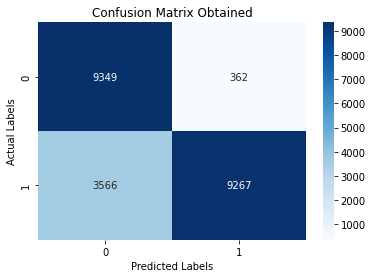

Accuarcy value obtained is  0.8258
F1-score obtained is  0.8251
Precision obtained is  0.9624
Recall obtained is  0.7221


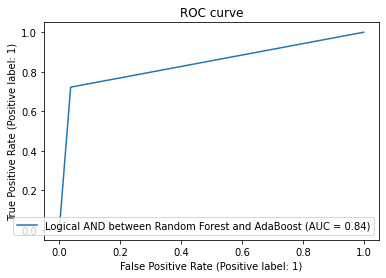

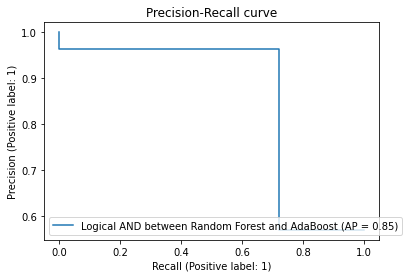

In [112]:
text = "Logical AND between Random Forest and AdaBoost"
and_logic_stacking_list = [text]
and_logic_stacking_list.extend(print_metrics(processed_test_data_Y,test_predictions_ind_wrapper_and_df["RF AND AdaBoost"].values,text))
and_logic_stacking_table.append(and_logic_stacking_list)

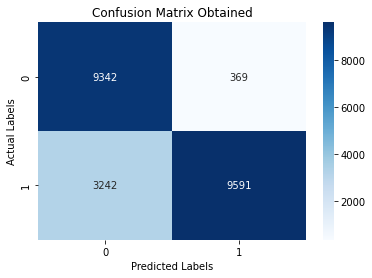

Accuarcy value obtained is  0.8398
F1-score obtained is  0.8416
Precision obtained is  0.963
Recall obtained is  0.7474


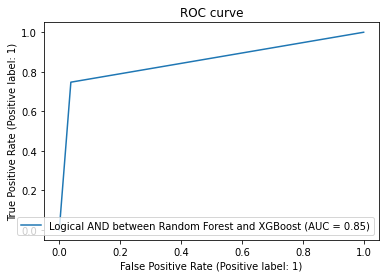

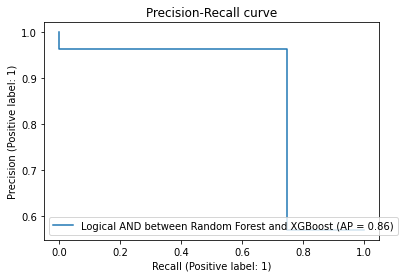

In [113]:
text = "Logical AND between Random Forest and XGBoost"
and_logic_stacking_list = [text]
and_logic_stacking_list.extend(print_metrics(processed_test_data_Y,test_predictions_ind_wrapper_and_df["RF AND XGBoost"].values,text))
and_logic_stacking_table.append(and_logic_stacking_list)

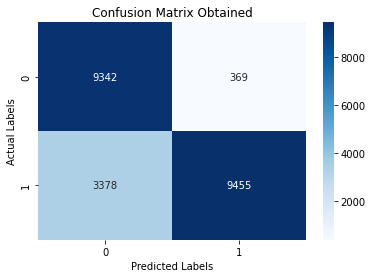

Accuarcy value obtained is  0.8338
F1-score obtained is  0.8346
Precision obtained is  0.9624
Recall obtained is  0.7368


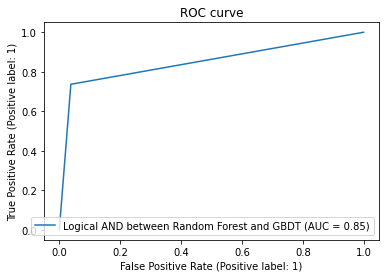

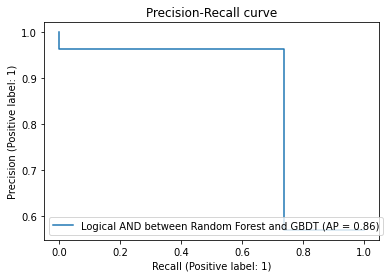

In [114]:
text = "Logical AND between Random Forest and GBDT"
and_logic_stacking_list = [text]
and_logic_stacking_list.extend(print_metrics(processed_test_data_Y,test_predictions_ind_wrapper_and_df["RF AND GBDT"].values,text))
and_logic_stacking_table.append(and_logic_stacking_list)

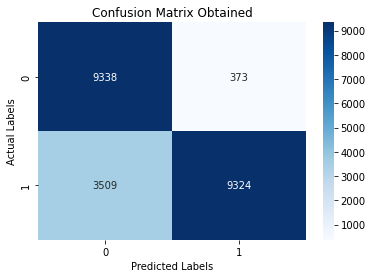

Accuarcy value obtained is  0.8278
F1-score obtained is  0.8277
Precision obtained is  0.9615
Recall obtained is  0.7266


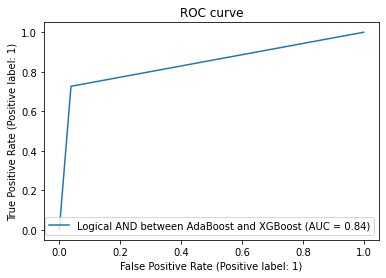

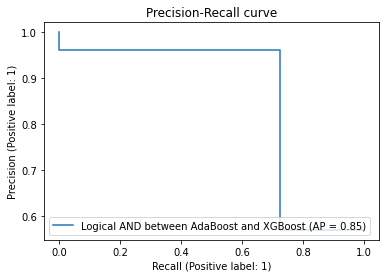

In [115]:
text = "Logical AND between AdaBoost and XGBoost"
and_logic_stacking_list = [text]
and_logic_stacking_list.extend(print_metrics(processed_test_data_Y,test_predictions_ind_wrapper_and_df["AdaBoost AND XGBoost"].values,text))
and_logic_stacking_table.append(and_logic_stacking_list)

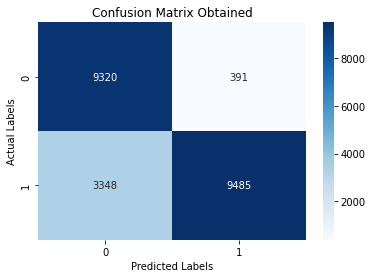

Accuarcy value obtained is  0.8341
F1-score obtained is  0.8354
Precision obtained is  0.9604
Recall obtained is  0.7391


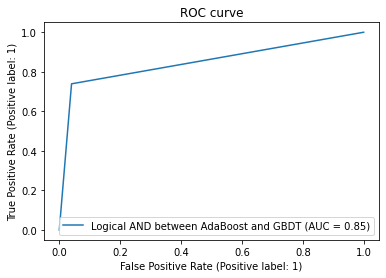

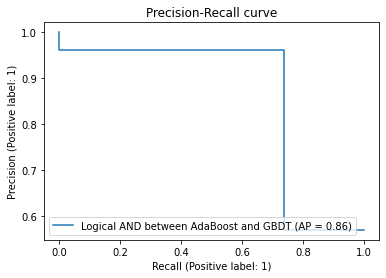

In [116]:
text = "Logical AND between AdaBoost and GBDT"
and_logic_stacking_list = [text]
and_logic_stacking_list.extend(print_metrics(processed_test_data_Y,test_predictions_ind_wrapper_and_df["AdaBoost AND GBDT"].values,text))
and_logic_stacking_table.append(and_logic_stacking_list)

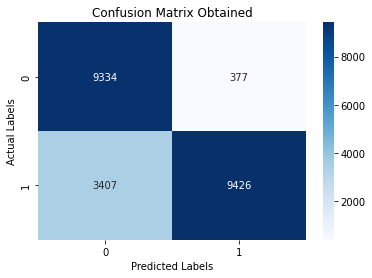

Accuarcy value obtained is  0.8322
F1-score obtained is  0.8328
Precision obtained is  0.9615
Recall obtained is  0.7345


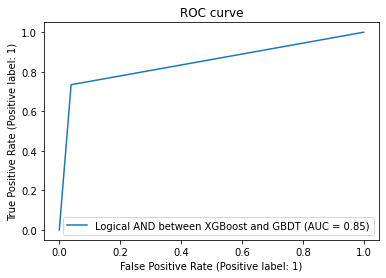

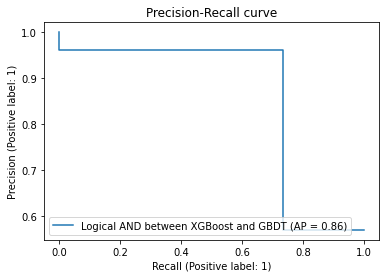

In [117]:
text = "Logical AND between XGBoost and GBDT"
and_logic_stacking_list = [text]
and_logic_stacking_list.extend(print_metrics(processed_test_data_Y,test_predictions_ind_wrapper_and_df["XGBoost AND GBDT"].values,text))
and_logic_stacking_table.append(and_logic_stacking_list)

In [118]:
and_logic_stacking_table

[['Logical AND between Random Forest and AdaBoost',
  0.8258,
  0.8251,
  0.9624,
  0.7221],
 ['Logical AND between Random Forest and XGBoost',
  0.8398,
  0.8416,
  0.963,
  0.7474],
 ['Logical AND between Random Forest and GBDT',
  0.8338,
  0.8346,
  0.9624,
  0.7368],
 ['Logical AND between AdaBoost and XGBoost', 0.8278, 0.8277, 0.9615, 0.7266],
 ['Logical AND between AdaBoost and GBDT', 0.8341, 0.8354, 0.9604, 0.7391],
 ['Logical AND between XGBoost and GBDT', 0.8322, 0.8328, 0.9615, 0.7345]]

In [119]:
#Tabulating the obtained results and displaying the results by formatting
logical_and_df = pd.DataFrame(and_logic_stacking_table, columns = ["Logical AND between Classifiers","accuracy","f1-score","Precision","Recall"])
with pd.option_context('display.precision', 4):
    formatted_table=(logical_and_df.style.background_gradient(cmap ='RdYlGn'))
formatted_table

,Logical AND between Classifiers,accuracy,f1-score,Precision,Recall
0,Logical AND between Random Forest and AdaBoost,0.8258,0.8251,0.9624,0.7221
1,Logical AND between Random Forest and XGBoost,0.8398,0.8416,0.9630,0.7474
2,Logical AND between Random Forest and GBDT,0.8338,0.8346,0.9624,0.7368
3,Logical AND between AdaBoost and XGBoost,0.8278,0.8277,0.9615,0.7266
4,Logical AND between AdaBoost and GBDT,0.8341,0.8354,0.9604,0.7391
5,Logical AND between XGBoost and GBDT,0.8322,0.8328,0.9615,0.7345


In [121]:
ind_wrapper_and_table = []

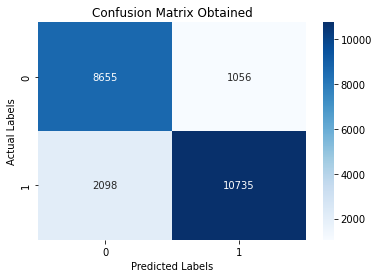

Accuarcy value obtained is  0.8601
F1-score obtained is  0.8719
Precision obtained is  0.9104
Recall obtained is  0.8365


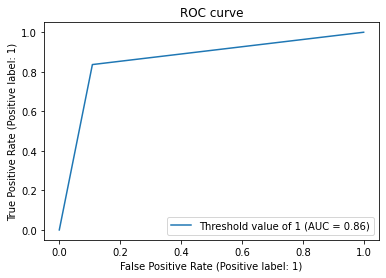

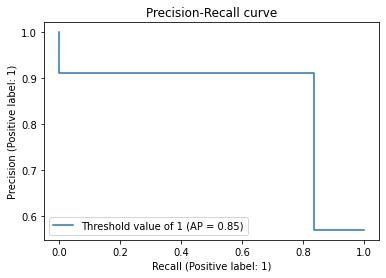

In [122]:
threshold = 1
test_predictions_ind_wrapper_and_df["final_prediction"] = test_predictions_ind_wrapper_and_df["sum_predictions"].apply(lambda x:1 if (x>=threshold) else 0)
ind_wrapper_and_list = ["Threshold value of {} while voting on various predictions".format(threshold)]
ind_wrapper_and_list.extend(print_metrics(processed_test_data_Y,test_predictions_ind_wrapper_and_df["final_prediction"].values,"Threshold value of {}".format(threshold)))
ind_wrapper_and_table.append(ind_wrapper_and_list)

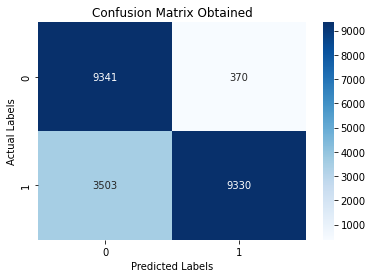

Accuarcy value obtained is  0.8282
F1-score obtained is  0.8281
Precision obtained is  0.9619
Recall obtained is  0.727


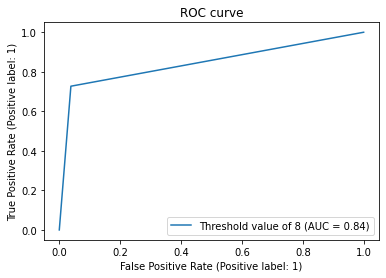

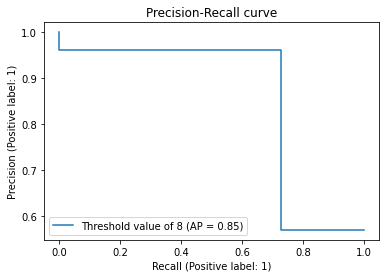

In [123]:
threshold = 8
test_predictions_ind_wrapper_and_df["final_prediction"] = test_predictions_ind_wrapper_and_df["sum_predictions"].apply(lambda x:1 if (x>=threshold) else 0)
ind_wrapper_and_list = ["Threshold value of {} while voting on various predictions".format(threshold)]
ind_wrapper_and_list.extend(print_metrics(processed_test_data_Y,test_predictions_ind_wrapper_and_df["final_prediction"].values,"Threshold value of {}".format(threshold)))
ind_wrapper_and_table.append(ind_wrapper_and_list)

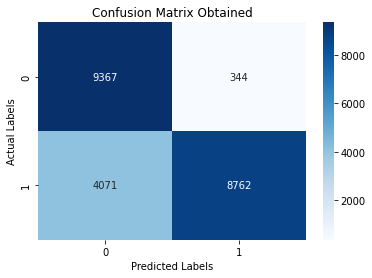

Accuarcy value obtained is  0.8042
F1-score obtained is  0.7988
Precision obtained is  0.9622
Recall obtained is  0.6828


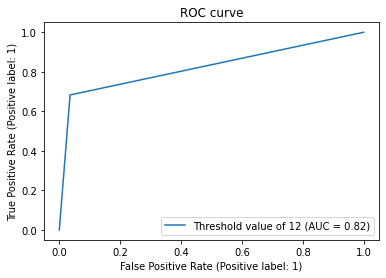

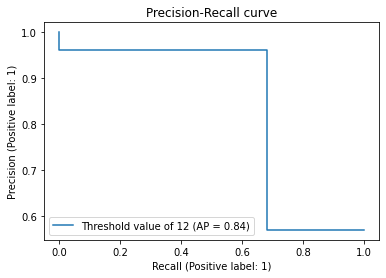

In [124]:
threshold = 12
test_predictions_ind_wrapper_and_df["final_prediction"] = test_predictions_ind_wrapper_and_df["sum_predictions"].apply(lambda x:1 if (x>=threshold) else 0)
ind_wrapper_and_list = ["Threshold value of {} while voting on various predictions".format(threshold)]
ind_wrapper_and_list.extend(print_metrics(processed_test_data_Y,test_predictions_ind_wrapper_and_df["final_prediction"].values,"Threshold value of {}".format(threshold)))
ind_wrapper_and_table.append(ind_wrapper_and_list)

In [125]:
ind_wrapper_and_table

[['Threshold value of 1 while voting on various predictions',
  0.8601,
  0.8719,
  0.9104,
  0.8365],
 ['Threshold value of 8 while voting on various predictions',
  0.8282,
  0.8281,
  0.9619,
  0.727],
 ['Threshold value of 12 while voting on various predictions',
  0.8042,
  0.7988,
  0.9622,
  0.6828]]

In [126]:
#Tabulating the obtained results and displaying the results by formatting
ind_wrapper_and_table_df = pd.DataFrame(ind_wrapper_and_table, columns = ["Threshold value","accuracy","f1-score","Precision","Recall"])
with pd.option_context('display.precision', 4):
    formatted_table=(ind_wrapper_and_table_df.style.background_gradient(cmap ='RdYlGn'))
formatted_table

,Threshold value,accuracy,f1-score,Precision,Recall
0,Threshold value of 1 while voting on various predictions,0.8601,0.8719,0.9104,0.8365
1,Threshold value of 8 while voting on various predictions,0.8282,0.8281,0.9619,0.7270
2,Threshold value of 12 while voting on various predictions,0.8042,0.7988,0.9622,0.6828
